In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import json
plt.style.use('ggplot')
import numpy as np

In [2]:
folder_path = '/mnt/sdc/esther-channel-data/'
selected_weeks = sorted(glob(folder_path+'*-*.json'))[299:299+24*40]
# 1118~1227

In [ ]:
# for json_file in tqdm(selected_weeks):
#     data = []
#     processed = []
#     with open(json_file) as f:
#         for line in f:
#             data.append(json.loads(line)['data'])
#             break
#     for stream_info in data[0]:
#         if(type(stream_info) == list):
#             processed.extend(stream_info)
#         elif(type(stream_info) == dict):
#             processed.append(stream_info)
#         else:
#             print(stream_info)
#     for x in processed:
#         for k in ['id', 'user_name', 'title', 'game_id', 'started_at']:
#             del x[k]
#     pd.DataFrame(processed, dtype=str).drop_duplicates(subset=['user_login']).to_csv(f'/mnt/sdc/esther-channel-data/esther_is_mature_result/{json_file.split("/")[-1].strip(".json")}.csv', index=False)


In [3]:
esther_data = sorted(glob(f'/mnt/sdc/esther-channel-data/esther_is_mature_result/*'))
popular_games = {}
for csvs in tqdm(esther_data):
    df = pd.read_csv(csvs)
    df2 = df[['game_name', 'viewer_count']].groupby('game_name').sum()
    game_dict = df2[df2['viewer_count'] > 1000].to_dict()['viewer_count']
    for k in game_dict.keys():
        try:
            popular_games[k] += game_dict[k]
        except:
            popular_games[k] = game_dict[k]

100%|██████████| 960/960 [00:58<00:00, 16.48it/s]


In [4]:
pd.Series(popular_games).to_frame('viewer_count').sort_values('viewer_count', ascending=False)[:20]

,viewer_count
Just Chatting,328562678
Grand Theft Auto V,160299392
League of Legends,118879454
VALORANT,115344163
Fortnite,79634028
Minecraft,73754887
Counter-Strike: Global Offensive,71600226
Call of Duty: Warzone,63943535
Apex Legends,61553423
Dota 2,55676624


In [5]:
game = 'Grand Theft Auto V'
result = {'True':[], 'False':[]}
for csvs in tqdm(esther_data):
    df = pd.read_csv(csvs, dtype=str)
    # df['viewer_count'].astype(int)
    res = df[df['game_name'] == game][['game_name', 'is_mature']].groupby('is_mature').count().to_dict()['game_name']
    for b in ['True', 'False']:
        result[b].append(res[b])


100%|██████████| 960/960 [00:58<00:00, 16.33it/s]


In [6]:
true_arr = np.zeros(24)
false_arr = np.zeros(24)
for i in range(40):
    true_arr += np.array(result['True'][24*i:24*(i+1)])
    false_arr += np.array(result['False'][24*i:24*(i+1)])

true_arr /= 40
false_arr /= 40
mature_dict = {'True': true_arr, 'False': false_arr}
df3 = pd.DataFrame(mature_dict)
df3['total'] = df3['True'] + df3['False']
df3['is_mature = True'] = df3['True'] / df3['total']
df3['_is_mature = False'] = 1 - df3['is_mature = True']


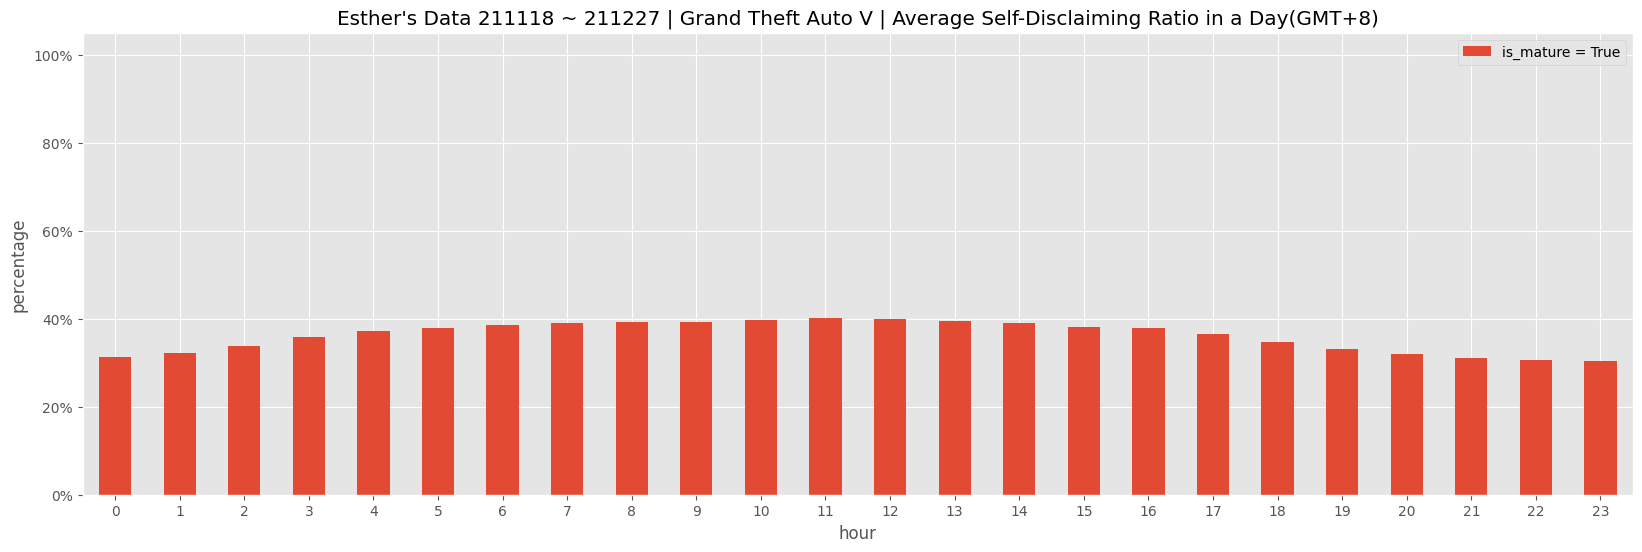

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 6))
ax_pd = df3[['is_mature = True', '_is_mature = False']].plot(kind='bar', stacked=True, ax=ax, rot=0, title=f'Esther\'s Data 211118 ~ 211227 | {game} | Average Self-Disclaiming Ratio in a Day(GMT+8)')
for p in ax_pd.patches[24:]:
    p.set_alpha(0)
ax.set_xlabel('hour')
ax.set_ylabel('percentage')
ax.set_yticks(ticks=np.arange(0, 1.1, 0.2), labels=[str(i)+'%' for i in range(0, 101, 20)])
plt.show()

In [8]:
df3

,True,False,total,is_mature = True,_is_mature = False
0,745.100,1635.800,2380.900,0.312949,0.687051
1,876.300,1835.875,2712.175,0.323099,0.676901
2,1048.350,2049.625,3097.975,0.338398,0.661602
3,1231.325,2214.475,3445.800,0.357341,0.642659
4,1421.725,2393.625,3815.350,0.372633,0.627367
5,1551.175,2534.975,4086.150,0.379618,0.620382
6,1555.150,2472.925,4028.075,0.386078,0.613922
7,1462.775,2275.525,3738.300,0.391294,0.608706
8,1317.825,2041.450,3359.275,0.392294,0.607706
9,1198.850,1849.600,3048.450,0.393265,0.606735


In [9]:
df[df['game_name'] == 'Grand Theft Auto V'][['game_name', 'is_mature']].groupby('is_mature').count().to_dict()['game_name']

{'False': 1744, 'True': 671}